In [1]:
import pandas as pd
import numpy as np

In [2]:
## part a:

In [3]:
bn = pd.read_csv("Desktop/Banknote.csv", header=None)

In [4]:
df = pd.DataFrame(bn);
df

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
## part b:

In [6]:
## checking missing values:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   float64
 2   2       1372 non-null   float64
 3   3       1372 non-null   float64
 4   4       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
## normalizing integer values:

In [9]:
from sklearn import preprocessing

In [10]:
df_scaleN = preprocessing.normalize(df[[0, 1, 2, 3]])
df_scaleN = pd.DataFrame(df_scaleN);
df_scaleN['4'] = df[4]
df_ready = df_scaleN
df_ready

,0,1,2,3,4
0,0.369056,0.883110,-0.286075,-0.045550,0
1,0.465045,0.835525,-0.251515,-0.149573,0
2,0.763780,-0.521232,0.380152,0.021031,0
3,0.301268,0.829982,-0.349606,-0.313278,0
4,0.050902,-0.688796,0.706823,-0.152873,0
...,...,...,...,...,...
1367,0.193595,0.643125,-0.691221,-0.266693,1
1368,-0.168665,-0.592375,0.786715,0.041512,1
1369,-0.165672,-0.594541,0.777189,-0.122680,1
1370,-0.230903,-0.543141,0.802981,-0.083084,1


In [11]:
## part c:

In [12]:
y = df_ready['4']

In [13]:
X = df_ready.drop(['4'], axis=1)

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [15]:
## part d:

In [16]:
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(centroids)
centroids

,0,1,2,3
0,0.015567,-0.412002,0.613780,0.063957
1,0.099362,0.711222,-0.172649,-0.228759


In [17]:
## part e:

In [18]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

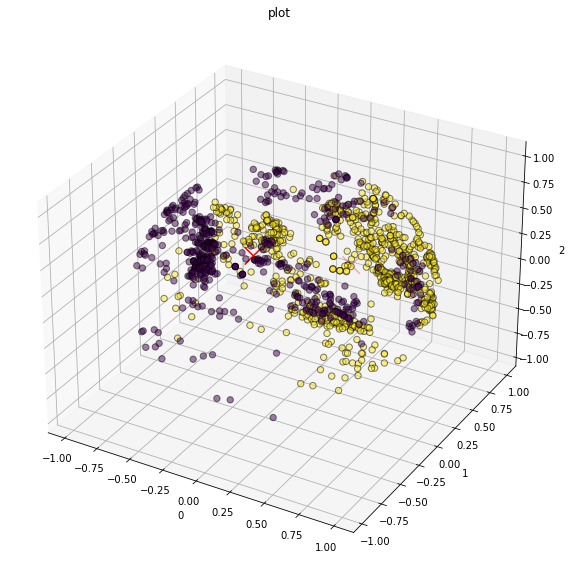

In [19]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[0], X[1], X[2],
            c=y_kmeans, cmap='viridis',
            edgecolor='k', s=40, alpha = 0.5)

ax.set_title("plot")
ax.set_xlabel("0")
ax.set_ylabel("1")
ax.set_zlabel("2")
ax.dist = 10

ax.scatter(centroids[0], centroids[1], centroids[2],
           s = 300, c = 'r', marker='x', label = 'Centroid')

plt.autoscale(enable=True, axis='x', tight=True)    

plt.show()

In [20]:
## part g:

In [21]:
kmeans.inertia_

577.5323317567828

In [22]:
## part h:

In [35]:
inertias = []; 
for i in range(1, 6): 
    kmeans1 = KMeans(n_clusters=i).fit(X);
    inertias.append(kmeans1.inertia_);
inertias

[1226.8216989520497,
 577.5323317567828,
 438.3564024416196,
 347.970862046972,
 297.85265245237053]

In [31]:
## part i:

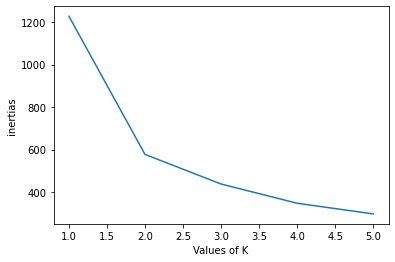

In [36]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(1, 5, 5)
plt.xlabel('Values of K')
plt.ylabel('inertias')
ax.plot(x, inertias);

In [84]:
## part j:

In [85]:
from sklearn.metrics import silhouette_score
silhouette_score(X, y_kmeans)

0.4914080638762628

In [86]:
np.unique(kmeans.labels_)

array([0, 1])

In [90]:
silhouettes = [];
for i in range(2, 6):
    kmeans2 = KMeans(n_clusters=i).fit(X);
    y_kmeans2 = kmeans2.predict(X);
    silhouettes.append(silhouette_score(X, y_kmeans2));
silhouettes

[0.4914080638762628,
 0.3902349005548654,
 0.367506051883332,
 0.38567573440163155]

In [91]:
silhouette = [];
for i in range(2,6):
    kmeans2 = KMeans(n_clusters=i).fit(X,y);
    silhouette.append(silhouette_score(X, kmeans2.labels_, metric='euclidean'));
silhouette

[0.4914080638762628, 0.3902349005548654, 0.367506051883332, 0.3876689487741205]

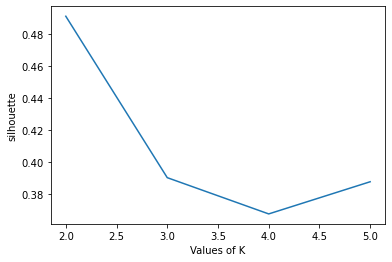

In [92]:
fig = plt.figure()
ax = plt.axes()
x2 = np.linspace(2, 5, 4)
plt.xlabel('Values of K')
plt.ylabel('silhouette')
ax.plot(x2, silhouette);